# Variability and custom types

In [1]:
function walk(num_steps)
    
    x = 0
    
    for i in 1:num_steps
        x += rand((-1, +1))
    end
    
    return x
end

walk (generic function with 1 method)

In [2]:
experiment(num_steps, num_walks) = [walk(num_steps) for i in 1:num_walks]

experiment (generic function with 1 method)

In [3]:
data = experiment(20, 5000);

In [4]:
using StatsBase

In [5]:
counts = countmap(data)

Dict{Int64,Int64} with 16 entries:
  -16 => 1
  2   => 840
  0   => 872
  -4  => 603
  10  => 73
  8   => 180
  6   => 369
  -6  => 356
  4   => 612
  -8  => 202
  -10 => 73
  14  => 4
  -12 => 27
  -2  => 757
  -14 => 5
  12  => 26

In [6]:
using Plots

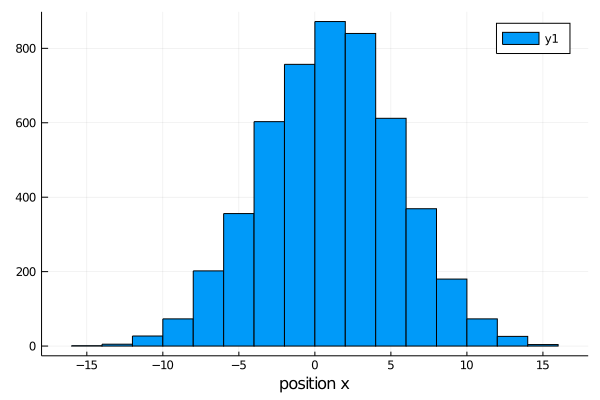

In [7]:
histogram(data, bins=20)
xlabel!("position x")

In [8]:
h = fit(Histogram, data) # fit() from StatsBase

Histogram{Int64,1,Tuple{StepRangeLen{Float64,Base.TwicePrecision{Float64},Base.TwicePrecision{Float64}}}}
edges:
  -16.0:2.0:16.0
weights: [1, 5, 27, 73, 202, 356, 603, 757, 872, 840, 612, 369, 180, 73, 26, 4]
closed: left
isdensity: false

In [9]:
h.weights / sum(h.weights)

16-element Array{Float64,1}:
 0.0002
 0.001
 0.0054
 0.0146
 0.0404
 0.0712
 0.1206
 0.1514
 0.1744
 0.168
 0.1224
 0.0738
 0.036
 0.0146
 0.0052
 0.0008

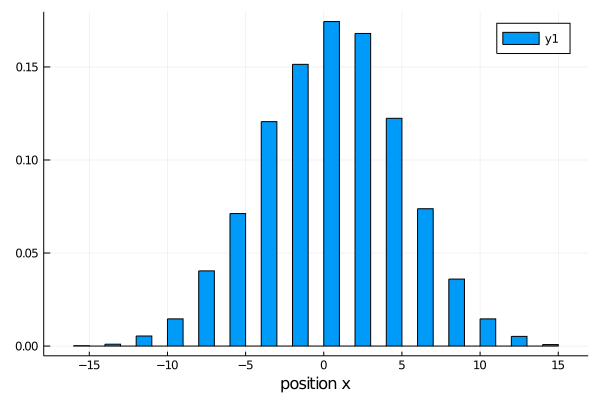

In [10]:
histogram(data, bins=40, normed=true)
xlabel!("position x")

In [11]:
mean(data)

0.0124

## Spread away from mean

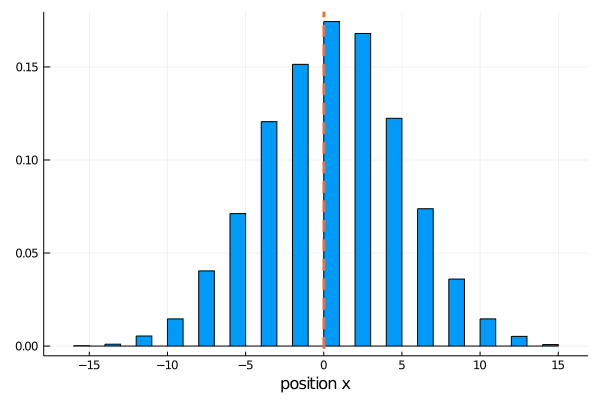

In [12]:
vline!([mean(data)], lw=3, ls=:dash, leg=false)

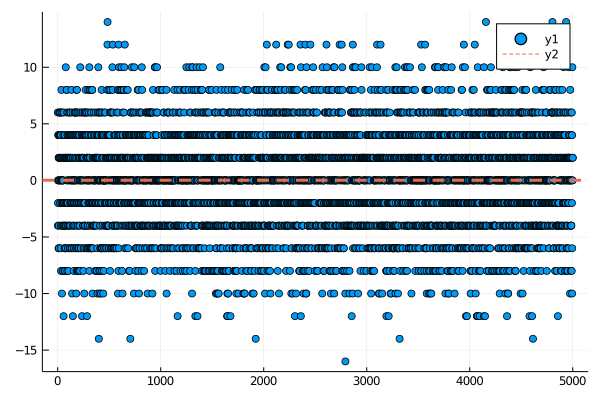

In [13]:
scatter(data)

hline!([mean(data)], lw=3, ls=:dash)

In [14]:
m = mean(data)
centered_data = data .- m # de-mean: subtract mean from each data point

5000-element Array{Float64,1}:
   5.9876
  -4.0124
  -2.0124
  -0.0124
  -0.0124
   3.9876
   3.9876
  -6.0124
   1.9876
  -4.0124
   1.9876
  -6.0124
  -0.0124
   ⋮
   3.9876
  -8.0124
   5.9876
  -2.0124
   3.9876
 -10.0124
  -6.0124
   9.9876
  -0.0124
  -0.0124
   1.9876
   1.9876

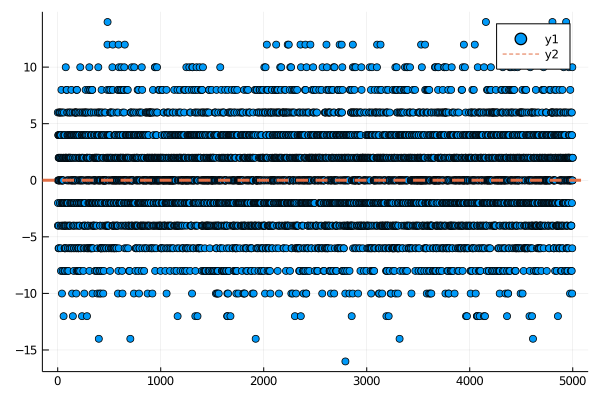

In [15]:
scatter(centered_data)
hline!([mean(centered_data)], lw=3, ls=:dash)

In [16]:
mean(centered_data)

1.5063505998114124e-16

This is the machine epsilon for double precision -- Float 64

In [17]:
abs_data = abs.(centered_data)

5000-element Array{Float64,1}:
  5.9876
  4.0124
  2.0124
  0.0124
  0.0124
  3.9876
  3.9876
  6.0124
  1.9876
  4.0124
  1.9876
  6.0124
  0.0124
  ⋮
  3.9876
  8.0124
  5.9876
  2.0124
  3.9876
 10.0124
  6.0124
  9.9876
  0.0124
  0.0124
  1.9876
  1.9876

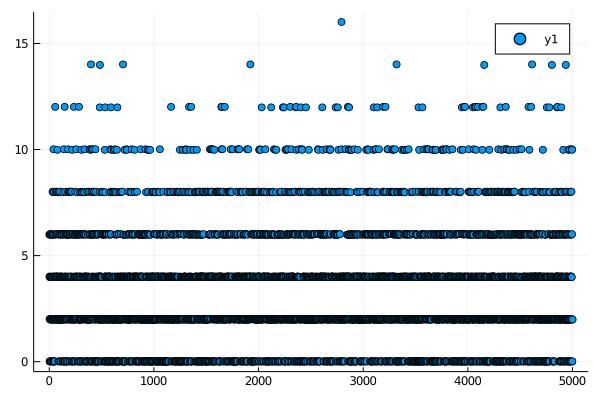

In [18]:
scatter(abs_data)

In [19]:
mean(abs_data)

3.54156416

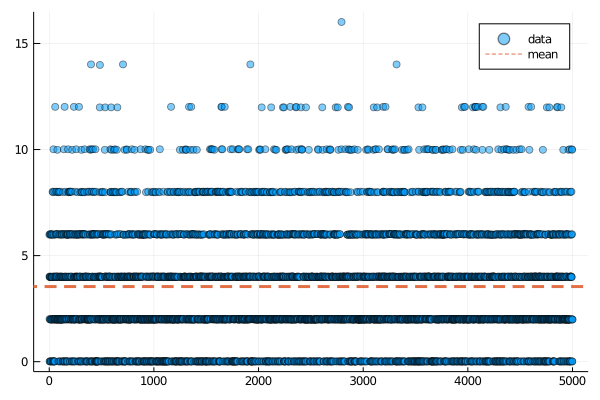

In [20]:
scatter(abs_data, alpha=0.5, label="data")
hline!([mean(abs_data)], lw=3, ls=:dash, label="mean")

In [21]:
m = mean(abs_data)

count(abs_data .< m) / length(abs_data)

0.4938

In [22]:
count(abs_data .< 2m) / length(abs_data)

0.8818

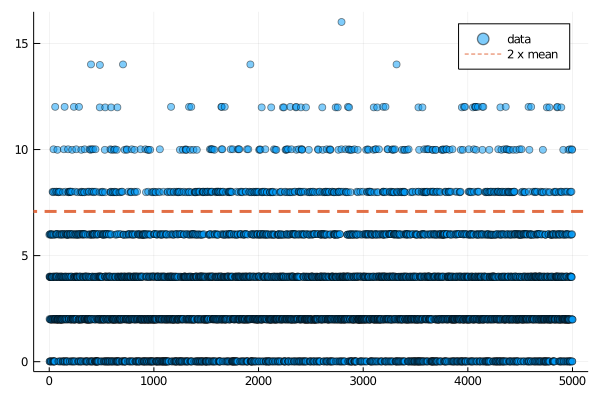

In [23]:
scatter(abs_data, alpha=0.5, label="data")
hline!([2 * mean(abs_data)], lw=3, ls=:dash, label="2 x mean")

L1 norm

In [24]:
m = mean(data)
squared_data = (data .- m).^2;

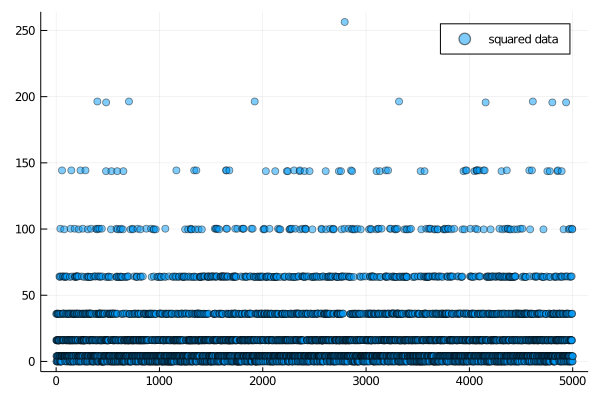

In [25]:
scatter(squared_data, alpha=0.5, label="squared data")

Note that this gives more weight to the outliers.

In [26]:
variance = mean(squared_data)

σ = √(variance)

4.486139346921805

In [27]:
(m - σ) .< data .< (m + σ)

5000-element BitArray{1}:
 0
 1
 1
 1
 1
 1
 1
 0
 1
 1
 1
 0
 1
 ⋮
 1
 0
 0
 1
 1
 0
 0
 0
 1
 1
 1
 1

In [28]:
count((m - σ) .< data .< (m + σ)) / length(data)

0.7368

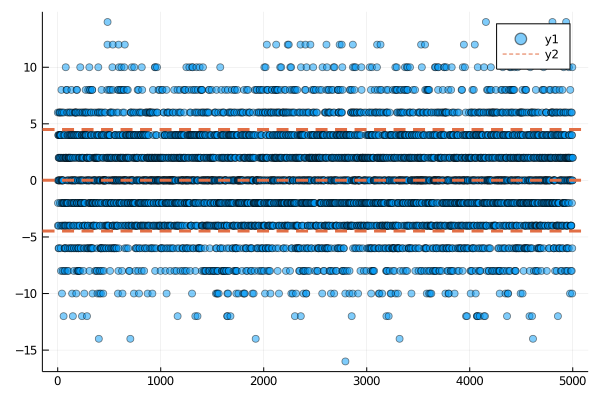

In [29]:
scatter(data, alpha=0.5)
hline!([m, m+σ, m-σ], lw=3, ls=:dash)

L2 norm

In [30]:
count((m - 2σ) .< data .< (m + 2σ)) / length(data)

0.9582

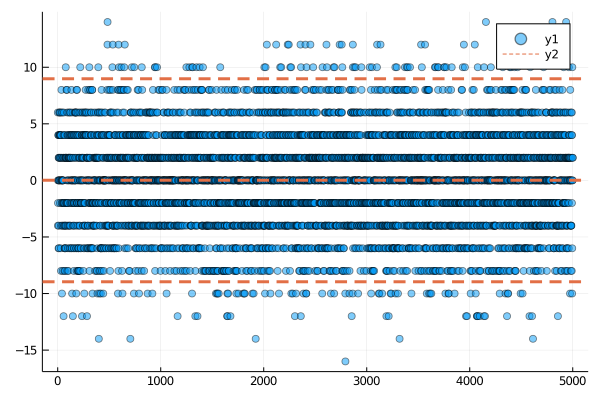

In [31]:
scatter(data, alpha=0.5)
hline!([m, m+2σ, m-2σ], lw=3, ls=:dash)

## Standard error of the mean

$N$ data points sampled from the same distribution, calculate the mean

In [36]:
num_steps = 20
N = 100

data = experiment(num_steps, N)

mean(data)

0.26

In [37]:
num_steps = 20
N = 1000

data = experiment(num_steps, N)

mean(data)

-0.09

How far are you from the true mean?

In [38]:
using Statistics

In [40]:
σ = std(data)

4.487319471135975

standard error of the the mean = $\sigma / \sqrt{N}$

In [41]:
sem = σ / √N

0.1419015011761188

In [42]:
# Collect the data a lot of times and get the means

mean_data = [mean(experiment(num_steps, N)) for i in 1:1000];

In [43]:
std(mean_data)

0.1462352756890616

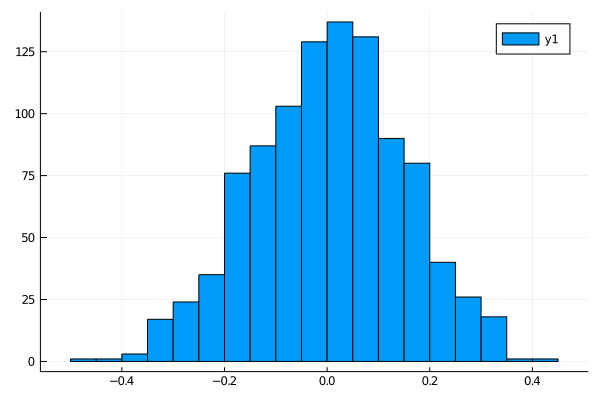

In [44]:
histogram(mean_data)

# Defining new types in Julia

Random walker:

Want to write **generic** code. A single `walk` function to generate random walk that works with discrete and continuous distributions.

In [45]:
discrete_jump() = rand( (-1, +1))

continuous_jump() = randn()

continuous_jump (generic function with 1 method)

In [46]:
function walk(N, jump)
    
    x = 0
    
    for i in 1:N
        x+= jump()
    end
    
    return x
end

walk (generic function with 2 methods)

In [47]:
walk(10, discrete_jump)

6

In [48]:
walk(10, continuous_jump)

1.087006165509119

But the continuous one changes x's type from int to float. For better performance, it's best to not change types.

## Custom types / user-defined types / composite types

In [49]:
struct MyDiscreteRandomWalker
    x::Int # type annotation: x is of type Integer
end

"Box with data inside"

To make an object of this type:

In [50]:
w = MyDiscreteRandomWalker(10)

MyDiscreteRandomWalker(10)

In [52]:
w.x

10

Move the walker:

In [53]:
w.x += 1

LoadError: setfield! immutable struct of type MyDiscreteRandomWalker cannot be changed

In [54]:
mutable struct MyDiscreteRandomWalker2
    x::Int
end

In [55]:
w = MyDiscreteRandomWalker2(10)

MyDiscreteRandomWalker2(10)

In [56]:
w.x += 1

11

In [58]:
jump!(w::MyDiscreteRandomWalker2) = w.x += rand( (-1, +1) )

jump! (generic function with 1 method)

In [59]:
w

MyDiscreteRandomWalker2(11)

In [60]:
jump!(w)

12

In [61]:
function walk!(w::MyDiscreteRandomWalker2, N)
    for i in 1:N
        jump!(w)
    end
end

walk! (generic function with 1 method)

In [62]:
MyDiscreteRandomWalker2() = MyDiscreteRandomWalker2(0)

MyDiscreteRandomWalker2

In [63]:
methods(MyDiscreteRandomWalker2)

# 3 methods for type constructor:
[1] MyDiscreteRandomWalker2() in Main at In[62]:1
[2] MyDiscreteRandomWalker2(x::Int64) in Main at In[54]:2
[3] MyDiscreteRandomWalker2(x) in Main at In[54]:2

In [64]:
w = MyDiscreteRandomWalker2()

MyDiscreteRandomWalker2(0)

In [66]:
walk!(w, 1)

In [67]:
w.x

-1